## **DRY BEANS CLASSIFICATION**

### - Srivatsav Venkatakrishnan
### - Bhavya Sree Sreeramulu Kishorekumar
### - Faculty of Engineering, Environment and Computing
### - MSc. Data Science and Computational Intelligence

# Importing Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


# Importing Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ML_CW_SEM2/Dry_Bean_Dataset.csv")
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [6]:
import os

os.listdir("/content/")

['.config', 'drive', 'sample_data']

# Pre Processing

In [7]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [8]:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [9]:
df["Class"].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [10]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

## **Exploratory Data Analysis**

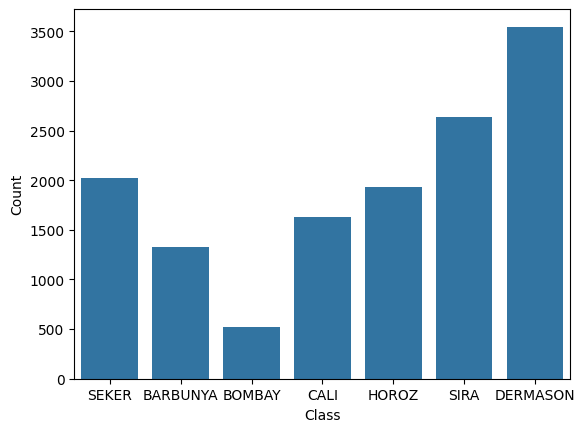

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Class' is the column name
sns.countplot(x='Class', data=df)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


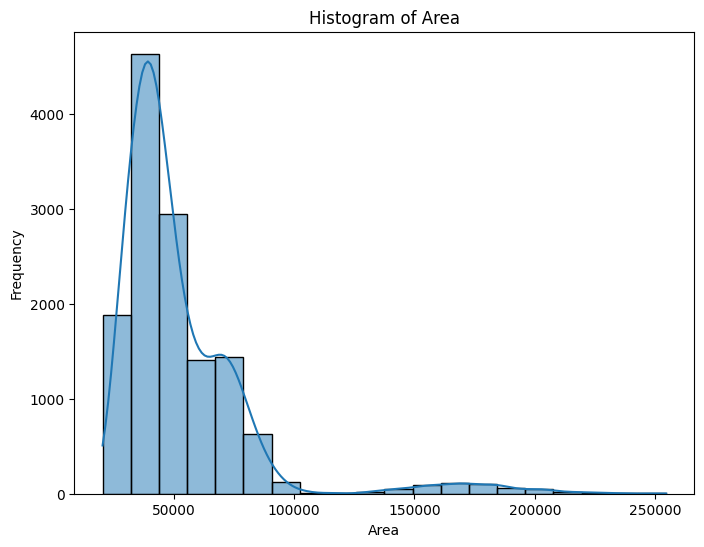

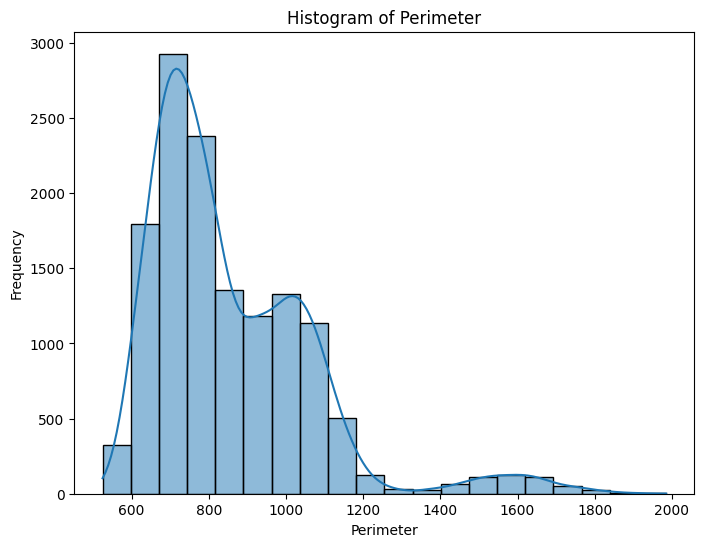

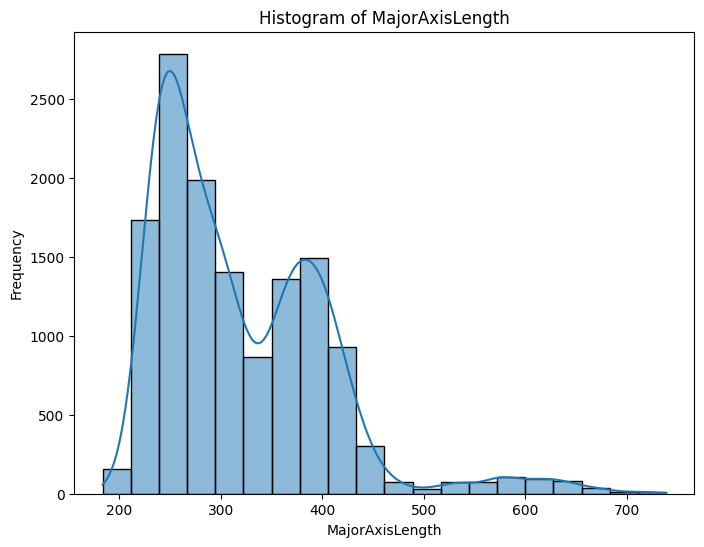

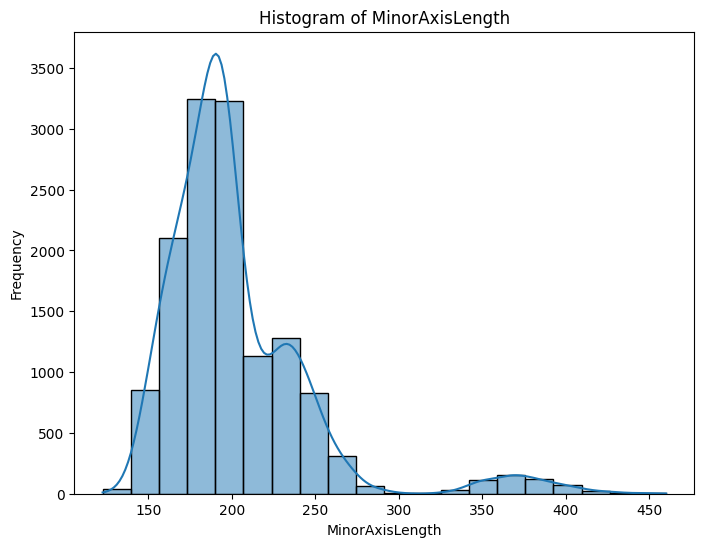

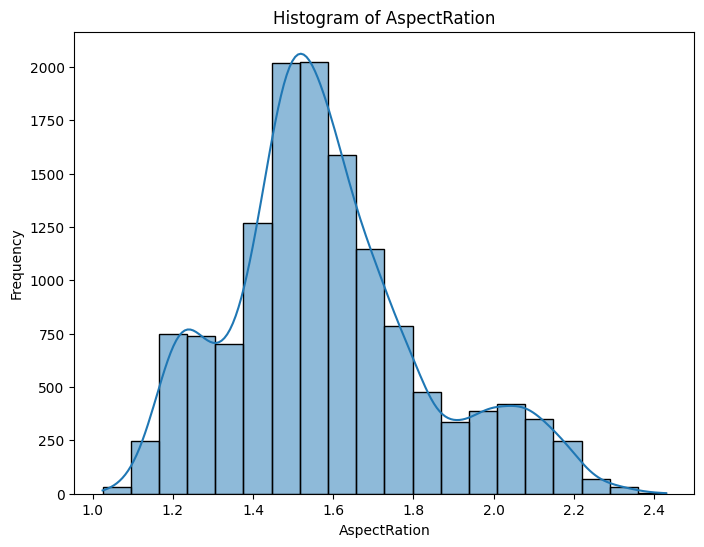

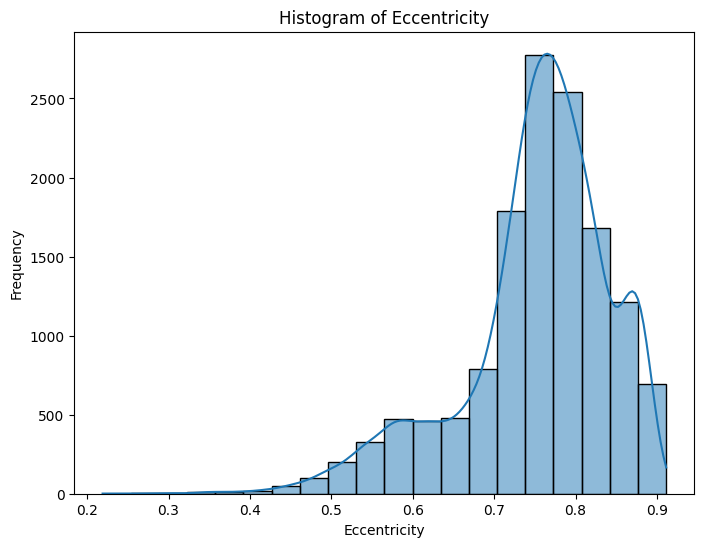

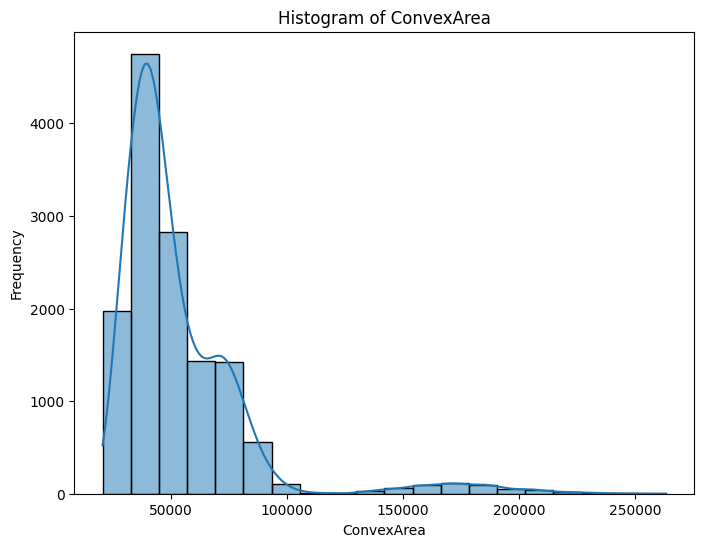

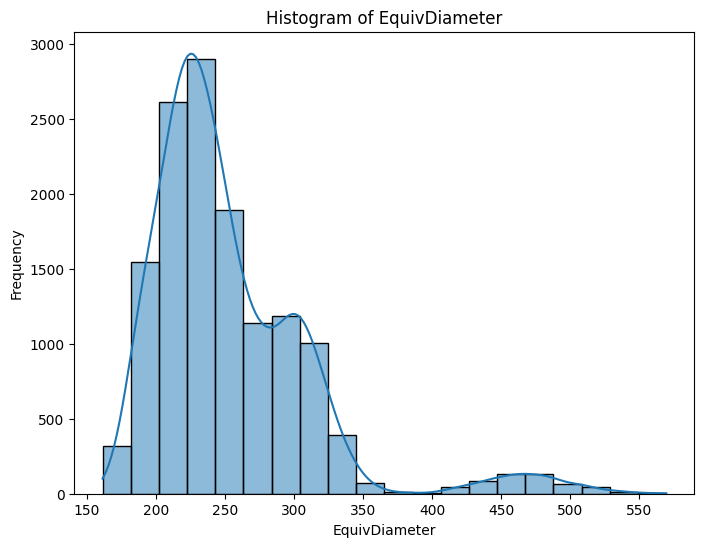

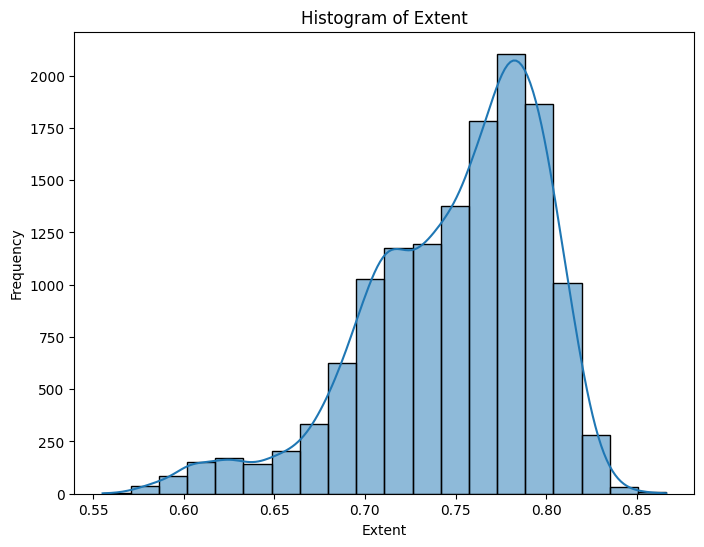

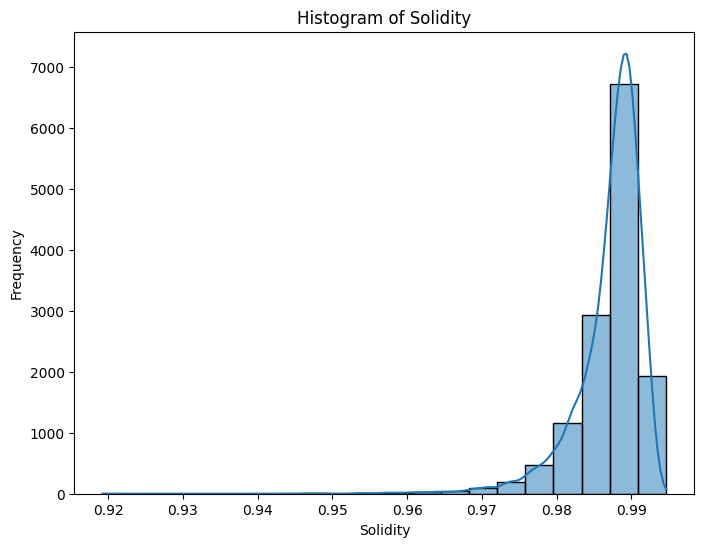

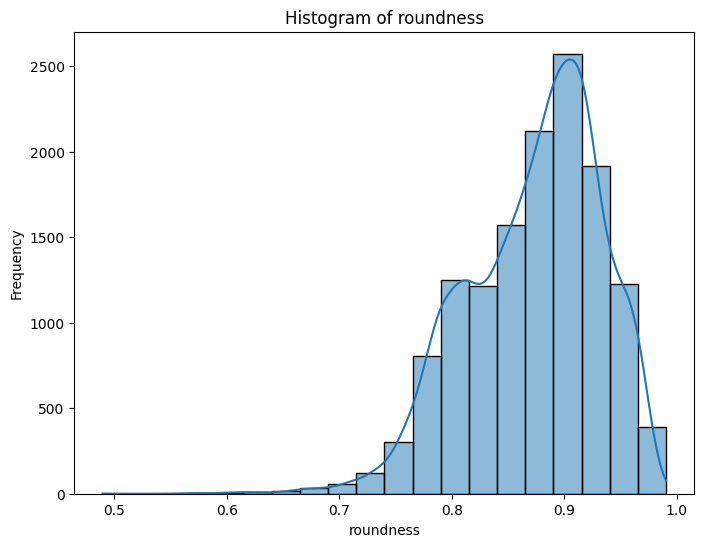

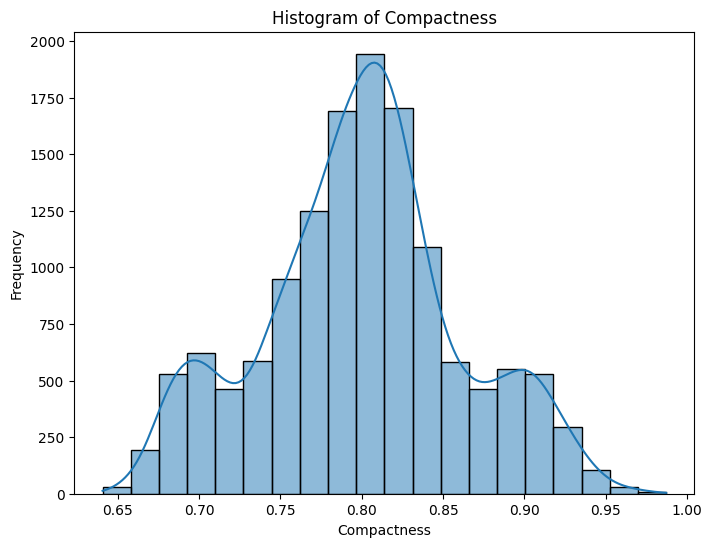

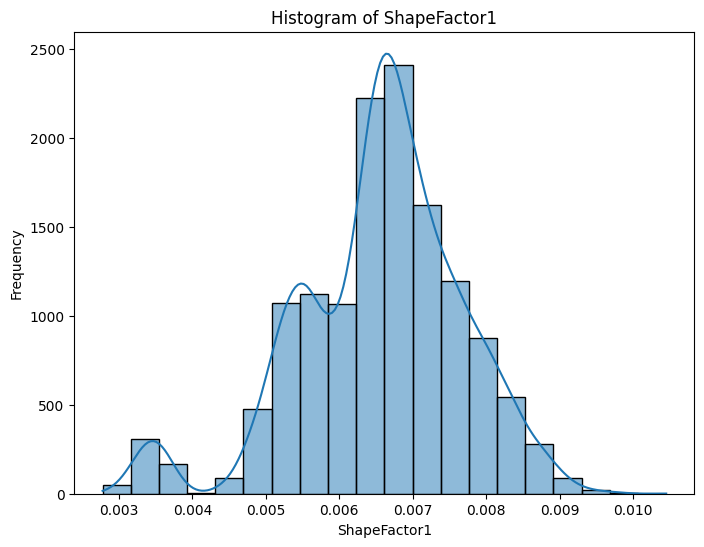

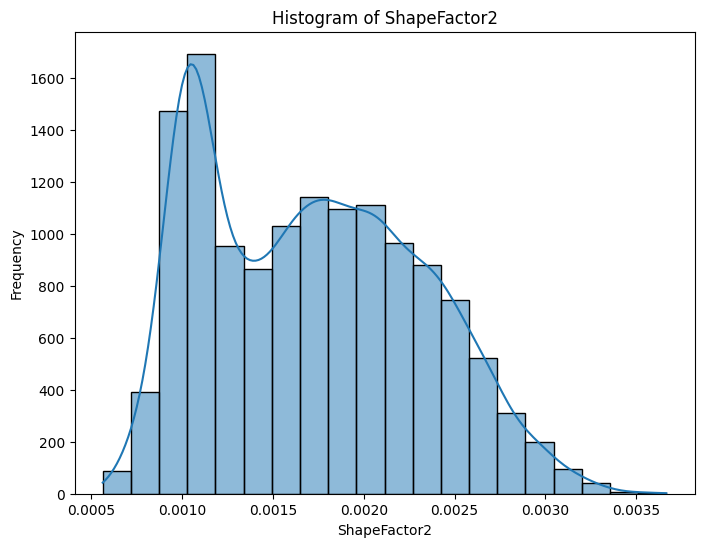

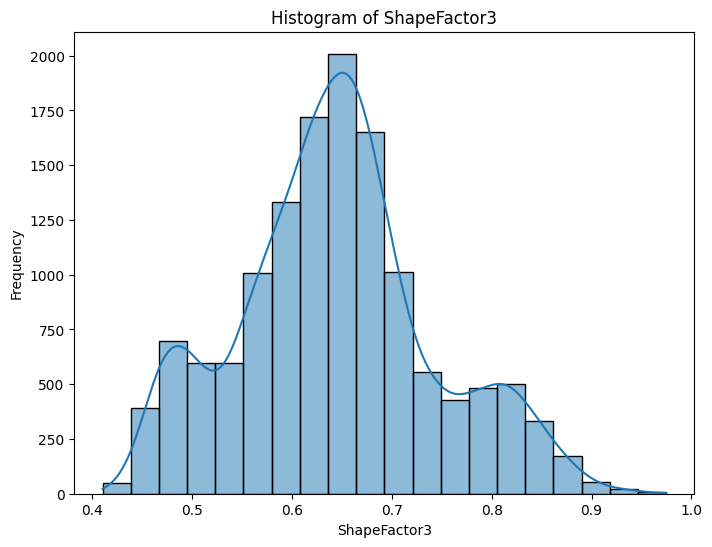

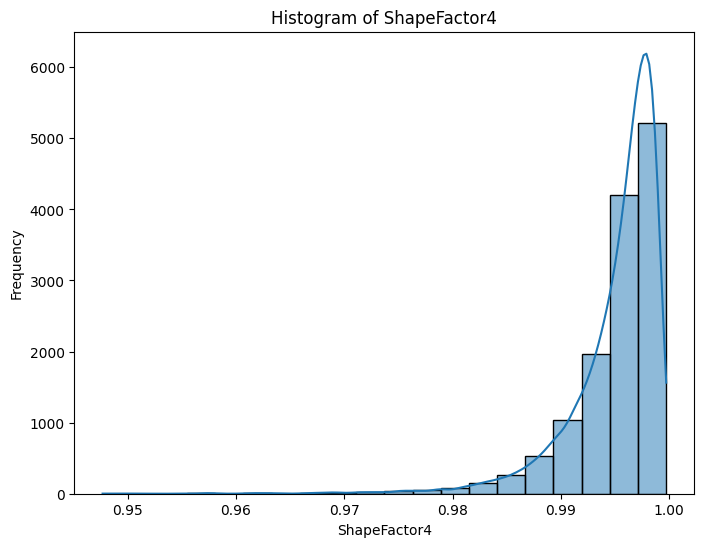

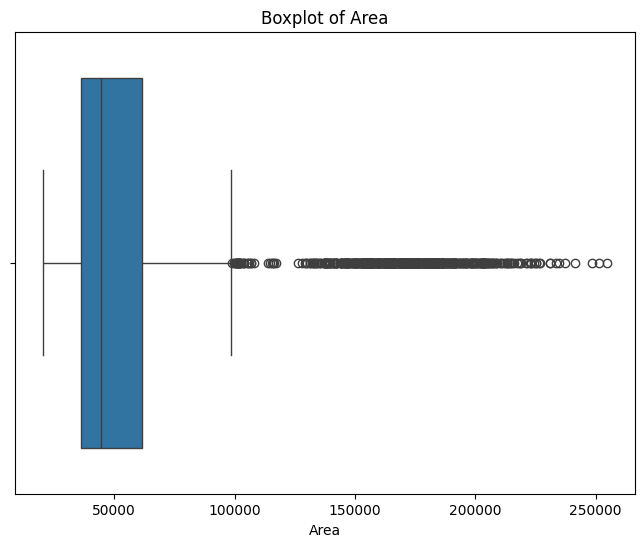

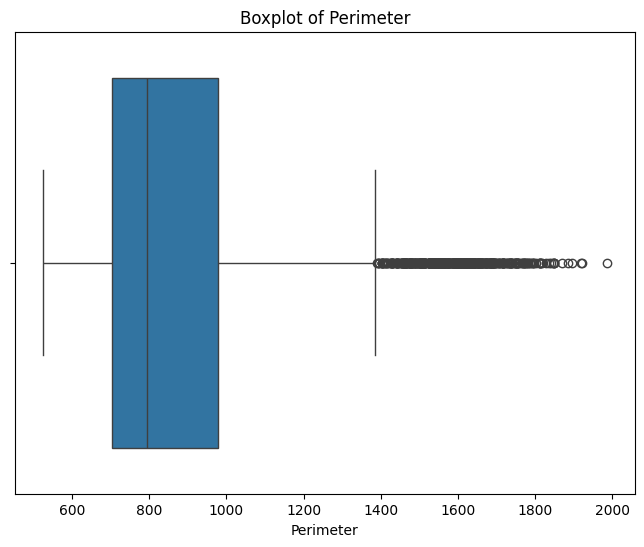

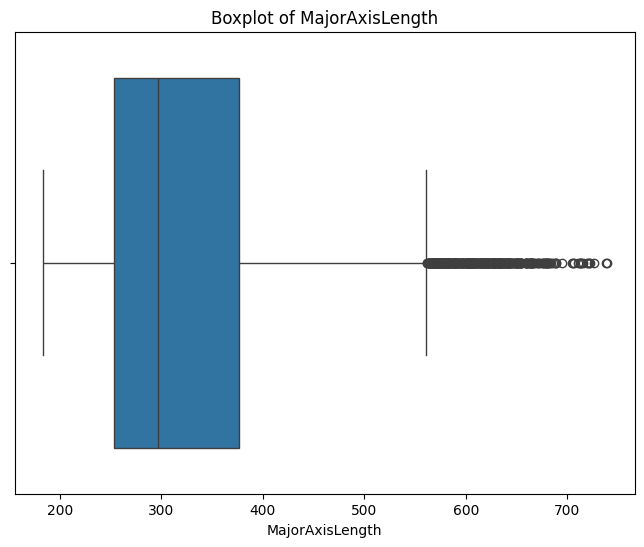

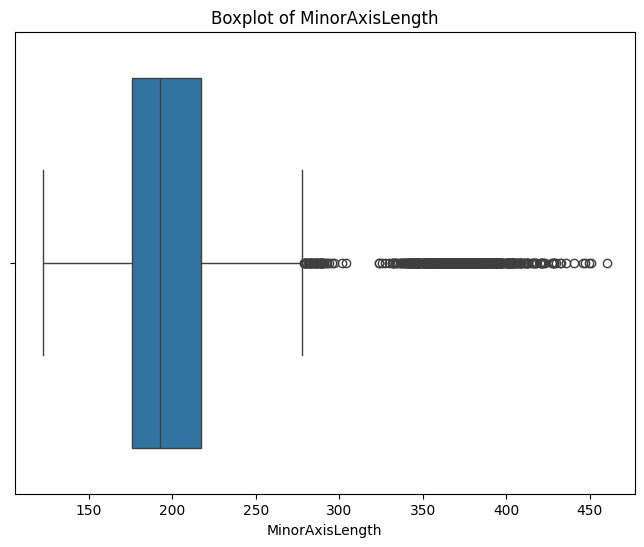

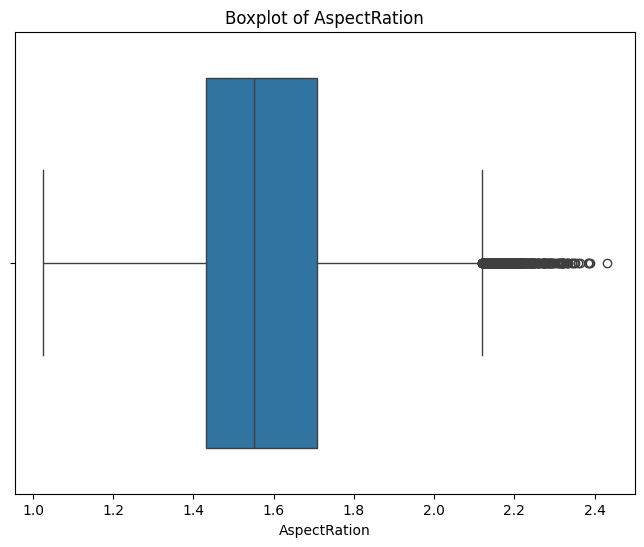

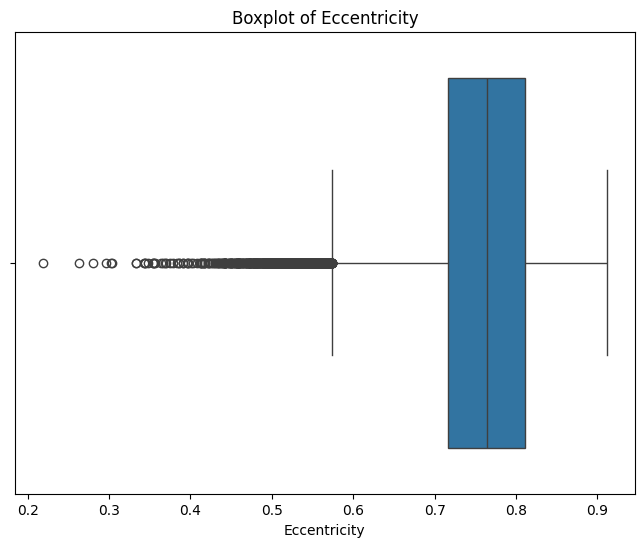

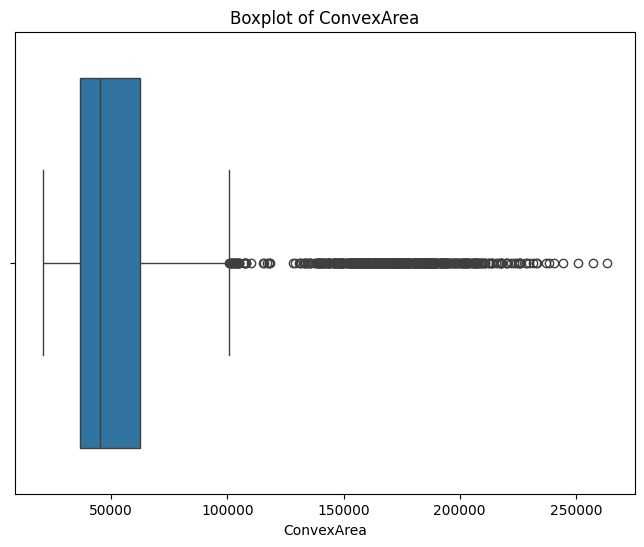

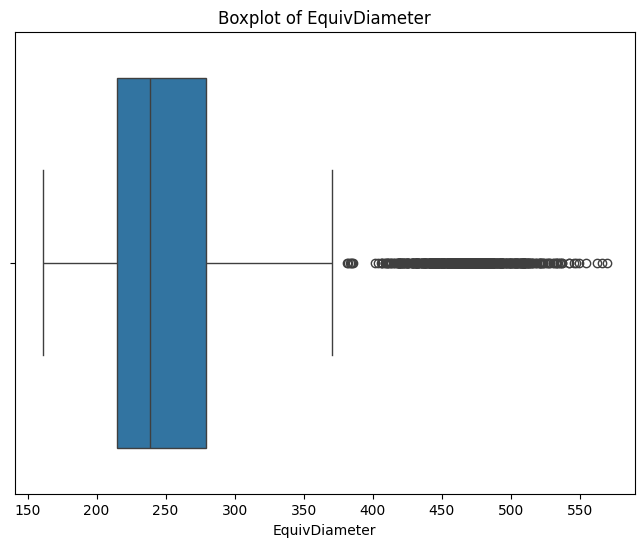

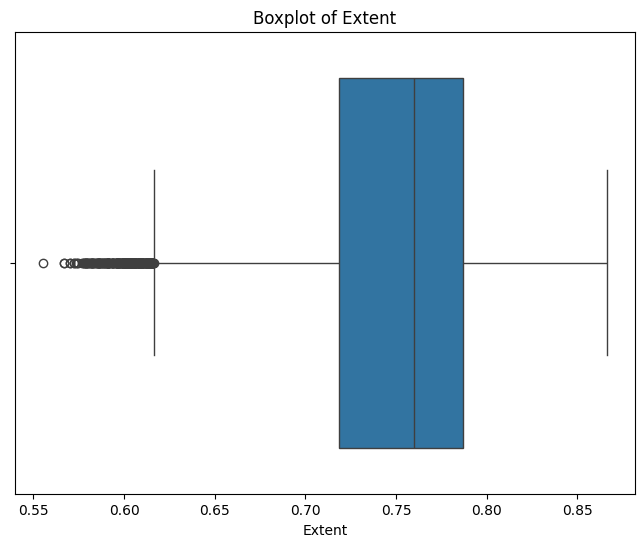

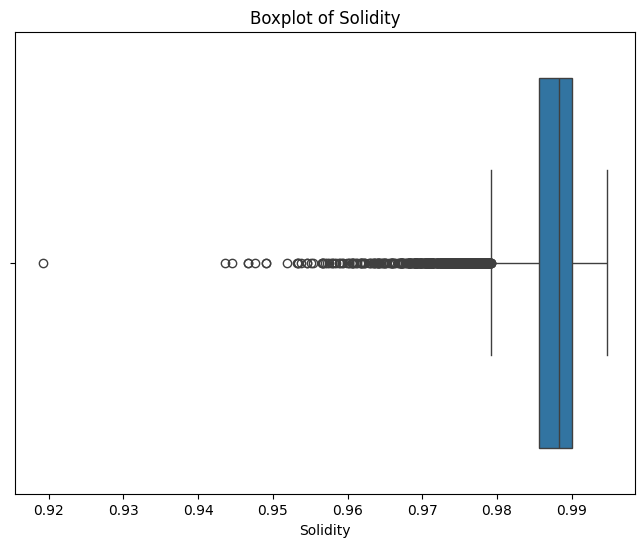

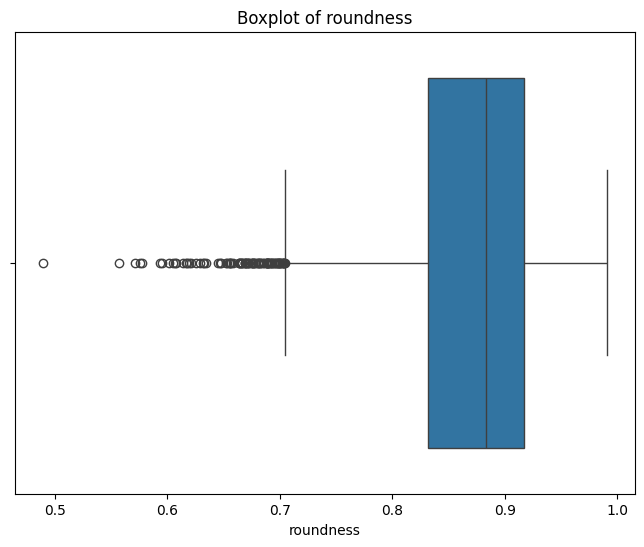

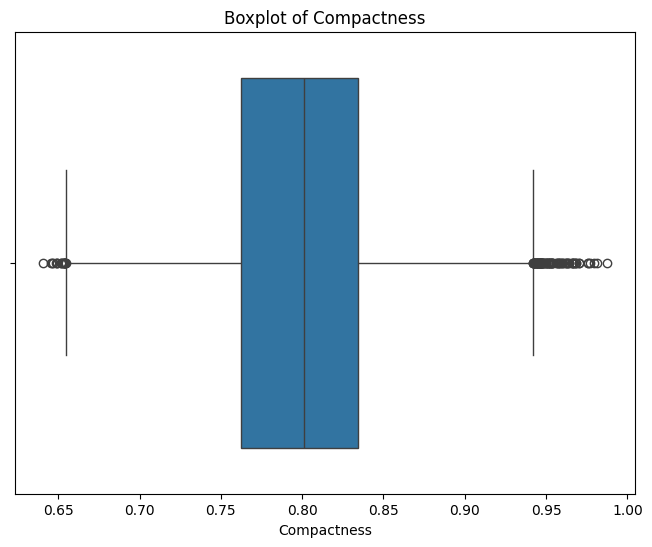

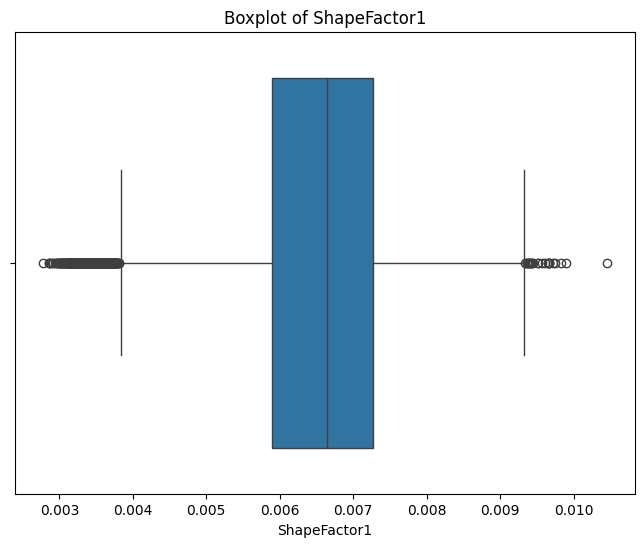

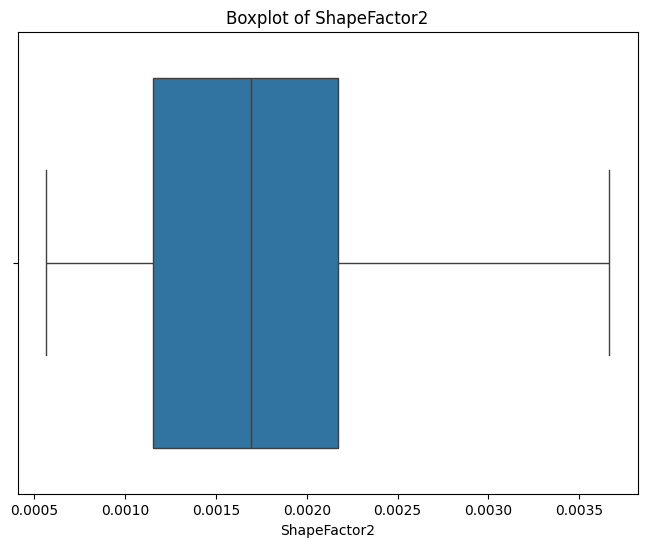

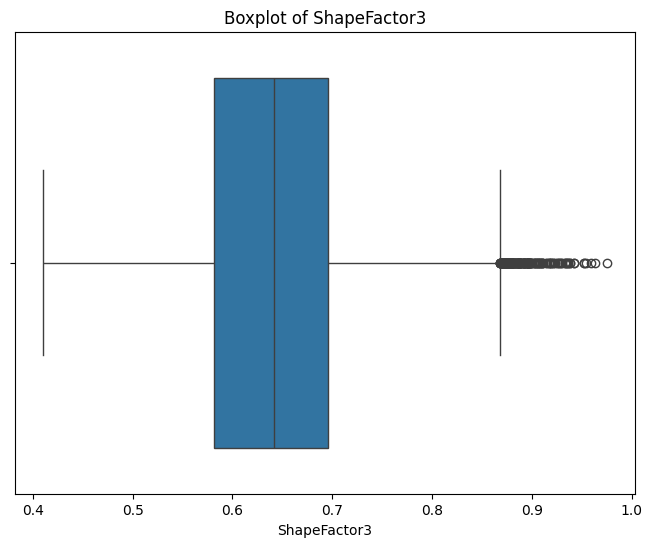

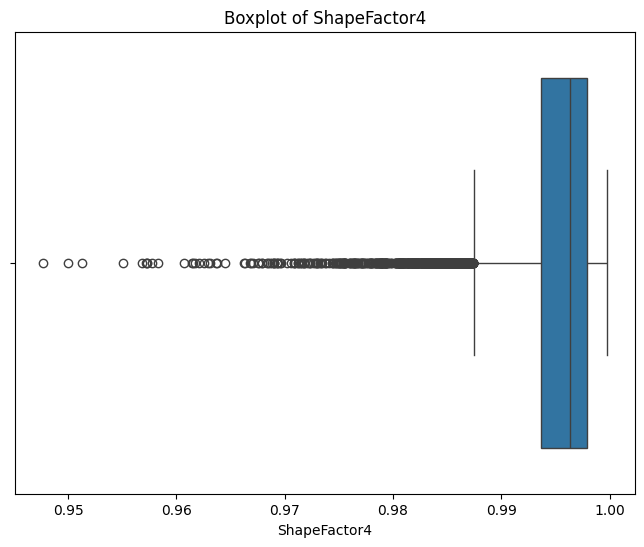

In [12]:
# Histogram for each numerical column
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Boxplot for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()



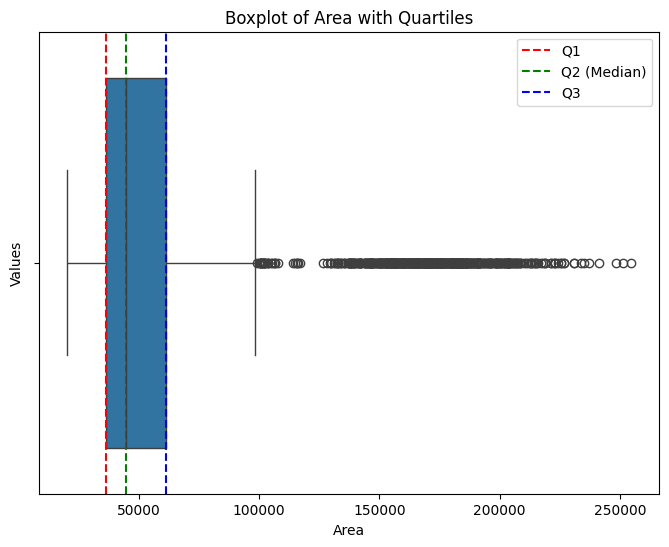

In [13]:

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate quartiles
Q1 = df['Area'].quantile(0.25)
Q2 = df['Area'].quantile(0.50)  # Median
Q3 = df['Area'].quantile(0.75)

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Area'])
plt.title('Boxplot of Area with Quartiles')
plt.xlabel('Area')
plt.ylabel('Values')

# Add quartile lines
plt.axvline(Q1, color='r', linestyle='--', label='Q1')
plt.axvline(Q2, color='g', linestyle='--', label='Q2 (Median)')
plt.axvline(Q3, color='b', linestyle='--', label='Q3')

plt.legend()
plt.show()


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [15]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


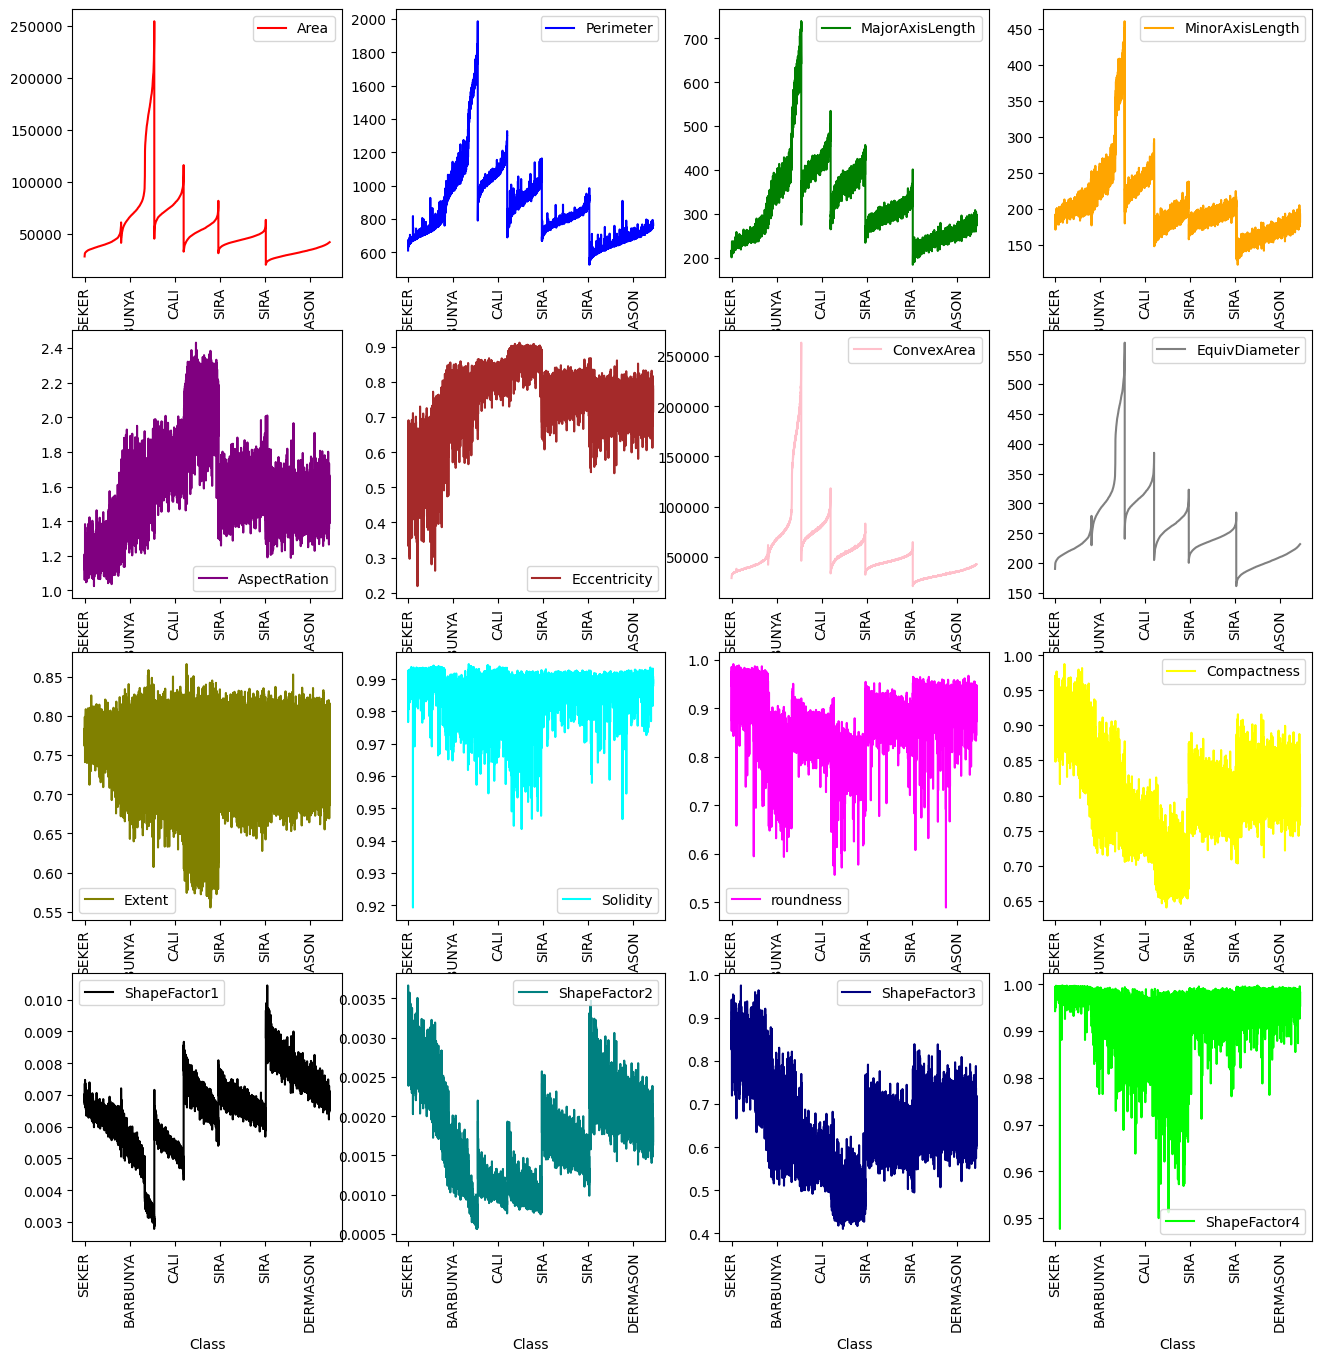

In [17]:
indicators = df.columns[:-1]
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow', 'black', 'teal', 'navy', 'lime']

# Assuming 'indicators' is your list of column names except for the last column 'Class'
df.plot(x='Class', y=indicators, subplots=True, layout=(4, 4),
        figsize=(16, 16), sharex=False, rot=90, color=colors)
plt.show()


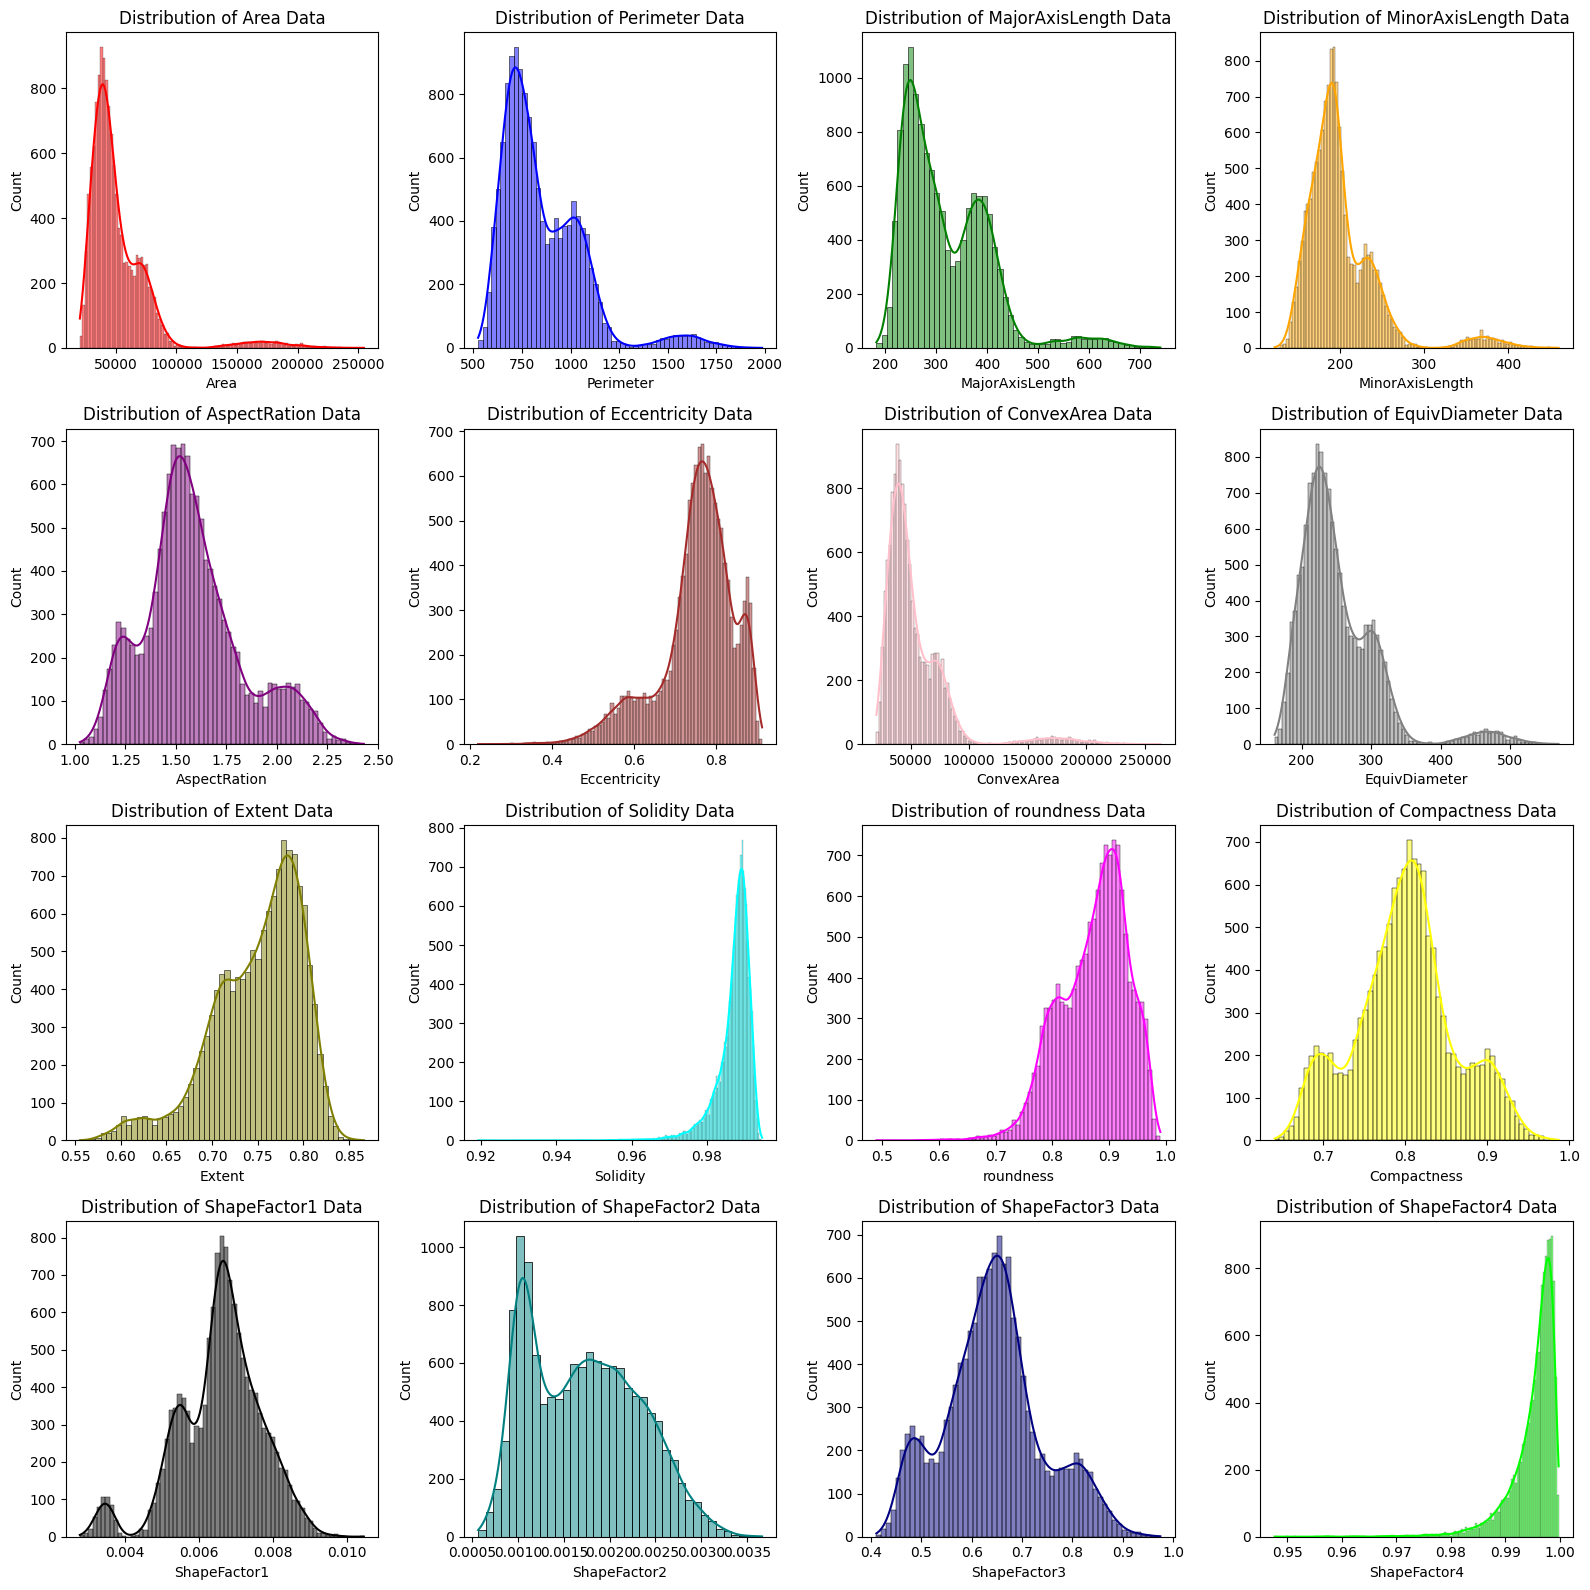

In [18]:
plt.figure(figsize=(16, 16))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow', 'black', 'teal', 'navy', 'lime']
for i, col in enumerate(indicators, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True, color=colors[i-1])  # Use a different color for each plot
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()

plt.show()


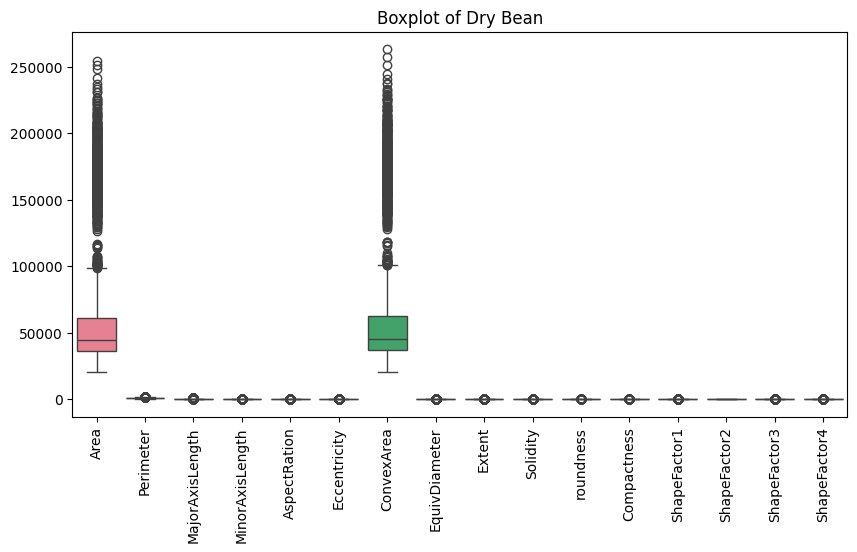

In [19]:
# Check outlier of Dry Bean features
plt.figure(figsize = (10, 5))
sns.boxplot(df[indicators])
plt.title("Boxplot of Dry Bean")
plt.xticks(rotation = 90)
plt.show()

In [20]:
# Delete outlier of "Area" & "ConvexArea"
df = df[(df["Area"] < 100000) | (df["ConvexArea"] < 100000)]

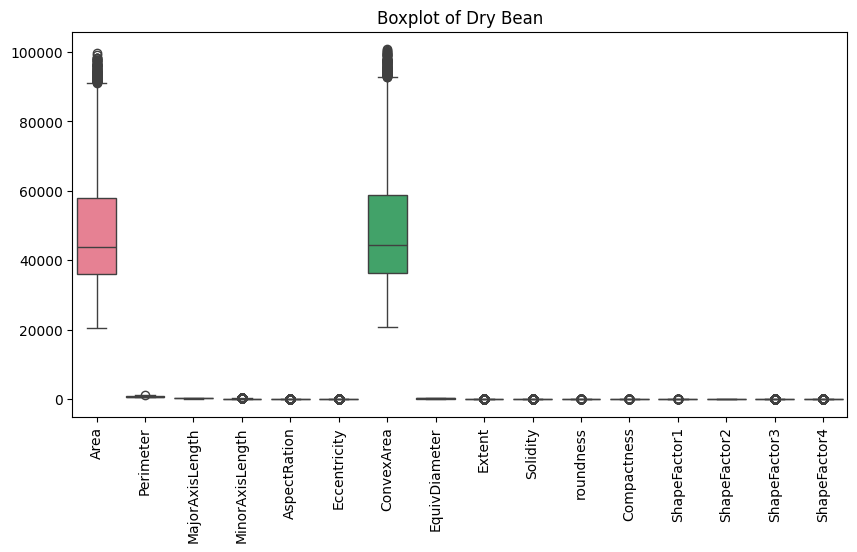

In [21]:
# Check Dry Bean features which outliers are deleted
plt.figure(figsize = (10, 5))
sns.boxplot(df[indicators])
plt.title("Boxplot of Dry Bean")
plt.xticks(rotation = 90)
plt.show()

In [22]:
# Correlation of Dry Bran with Class
le = LabelEncoder()
df["Class"] = le.fit_transform(df["Class"])
df_corr = df.corr()
df_corr["Class"].sort_values(ascending = False)

Class              1.000000
roundness          0.362622
Solidity           0.320695
ShapeFactor2       0.268620
ShapeFactor1       0.242638
ShapeFactor3       0.188754
Compactness        0.178909
ShapeFactor4       0.155742
Extent             0.000110
AspectRation      -0.144175
Eccentricity      -0.216365
MinorAxisLength   -0.350952
MajorAxisLength   -0.365682
EquivDiameter     -0.395852
Perimeter         -0.422265
Area              -0.440134
ConvexArea        -0.443145
Name: Class, dtype: float64

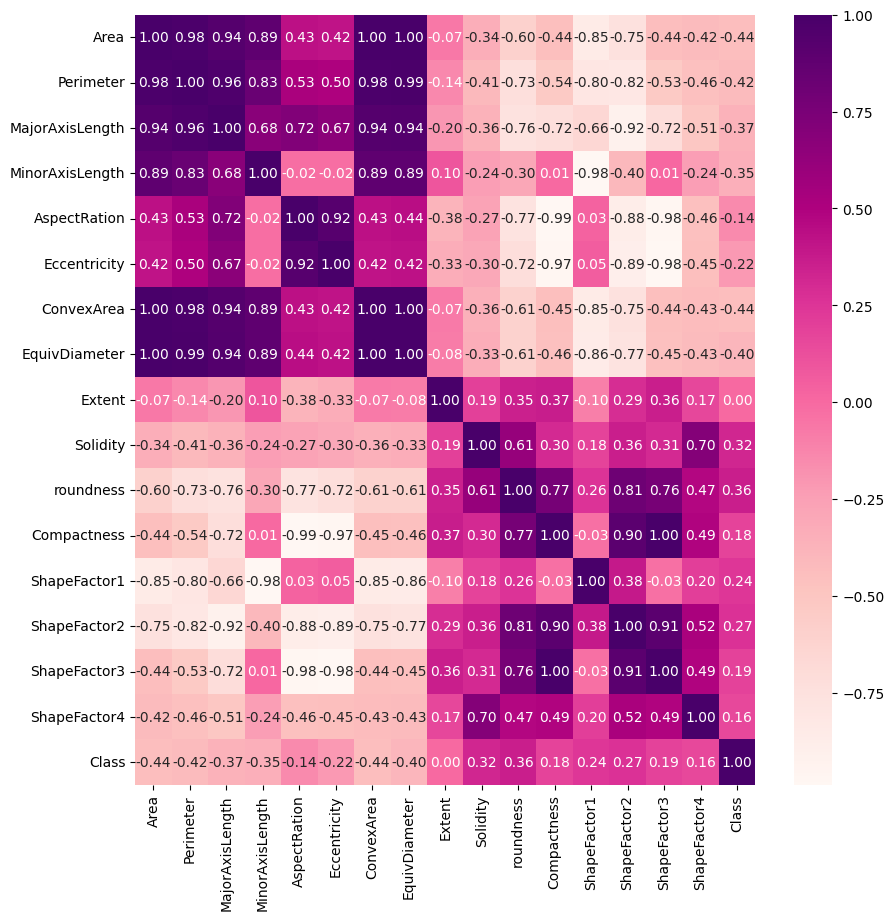

In [23]:
plt.figure(figsize = (10, 10))
sns.heatmap(df_corr, cmap = 'RdPu', annot = True, fmt = ".2f")
plt.show()

# Data Spliting And Feature Scaling

In [24]:
# Split Train/Test
X = df.iloc[:,:-1]
y = df.iloc[:, -1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# ML Classification Algorithms

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Initialize machine learning classifiers
ml_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "LightGBM": lgb.LGBMClassifier()
}


# DL Classification Algorithm

In [27]:
from sklearn.neural_network import MLPClassifier

# Initialize deep learning classifiers
dl_classifiers = {
    "Neural Network": MLPClassifier()
}

# Initialize tracking variables for best models
best_ml_accuracy = 0
best_ml_classifier = None
best_dl_accuracy = 0
best_dl_classifier = None



# Model Training

In [28]:
for clf_name, clf in ml_classifiers.items():
    clf.fit(X_train_sc, y_train)
    y_pred = clf.predict(X_test_sc)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf_name} accuracy: {accuracy}")

    if accuracy > best_ml_accuracy:
        best_ml_accuracy = accuracy
        best_ml_classifier = clf_name

# Evaluate deep learning classifiers
for clf_name, clf in dl_classifiers.items():
    clf.fit(X_train_sc, y_train)
    y_pred = clf.predict(X_test_sc)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf_name} accuracy: {accuracy}")

    if accuracy > best_dl_accuracy:
        best_dl_accuracy = accuracy
        best_dl_classifier = clf_name

# Print the best classifiers
print(f"\nThe best machine learning classifier is: {best_ml_classifier} with an accuracy of {best_ml_accuracy}")
print(f"The best deep learning classifier is: {best_dl_classifier} with an accuracy of {best_dl_accuracy}")

Logistic Regression accuracy: 0.9181017986988136
Decision Tree accuracy: 0.892460773057788
Random Forest accuracy: 0.9181017986988136
Support Vector Machine accuracy: 0.9238423268274014
k-Nearest Neighbors accuracy: 0.9119785686949866
Gradient Boosting accuracy: 0.9207807118254879
Gaussian Naive Bayes accuracy: 0.8928434749330272
AdaBoost accuracy: 0.770761576731726
XGBoost accuracy: 0.918867202449292
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002027 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 10449, number of used features: 16
[LightGBM] [Info] Start training from score -2.292966
[LightGBM] [Info] Start training from score -2.088768
[LightGBM] [Info] Start training from score -1.310124
[LightGBM] [Info] Start training from score -1.916023
[LightGBM] [Info] Start training from score -1.840291
[LightGBM] [Info] Start training fro

# Model Results

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001802 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 10449, number of used features: 16
[LightGBM] [Info] Start training from score -2.292966
[LightGBM] [Info] Start training from score -2.088768
[LightGBM] [Info] Start training from score -1.310124
[LightGBM] [Info] Start training from score -1.916023
[LightGBM] [Info] Start training from score -1.840291
[LightGBM] [Info] Start training from score -1.612217
Logistic Regression - Accuracy: 0.9181017986988136, Precision: 0.9187838678790914, Recall: 0.9181017986988136, F1 Score: 0.9182107504330982
Decision Tree - Accuracy: 0.8913126674320704, Precision: 0.8907862138649383, Recall: 0.8913126674320704, F1 Score: 0.8907799850495155
Random Forest - Accuracy: 0.9181017986988136, Precision: 0.9185353859651443, Recall: 0.9181017986988136, F1 Score

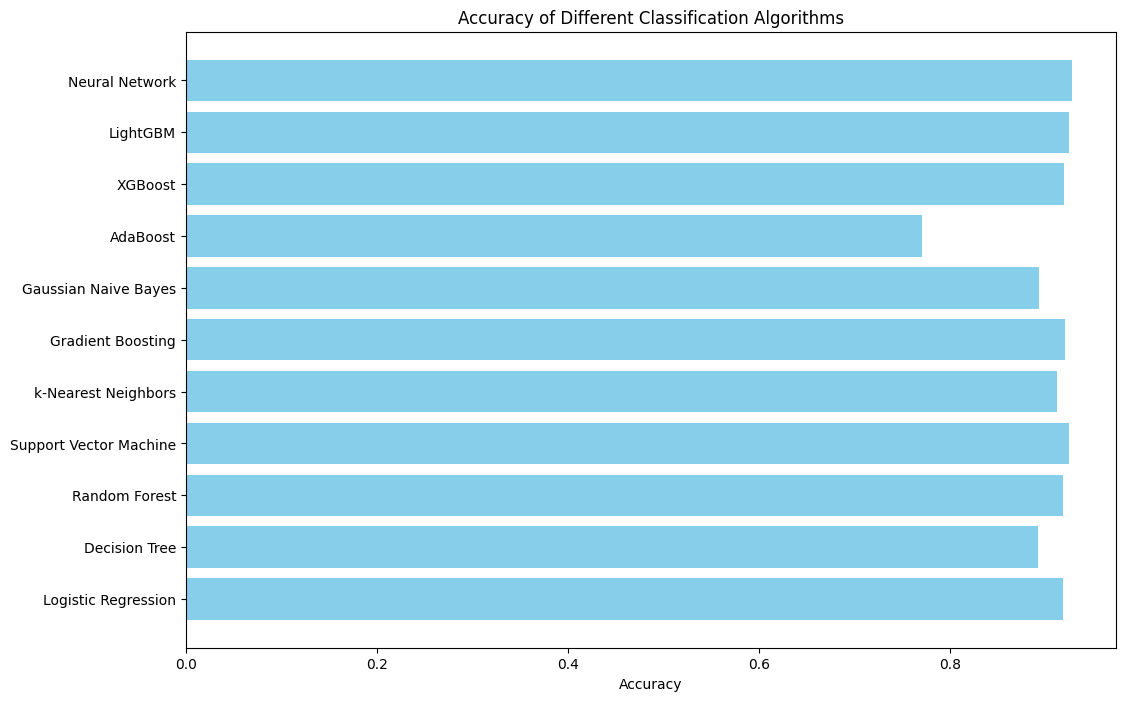

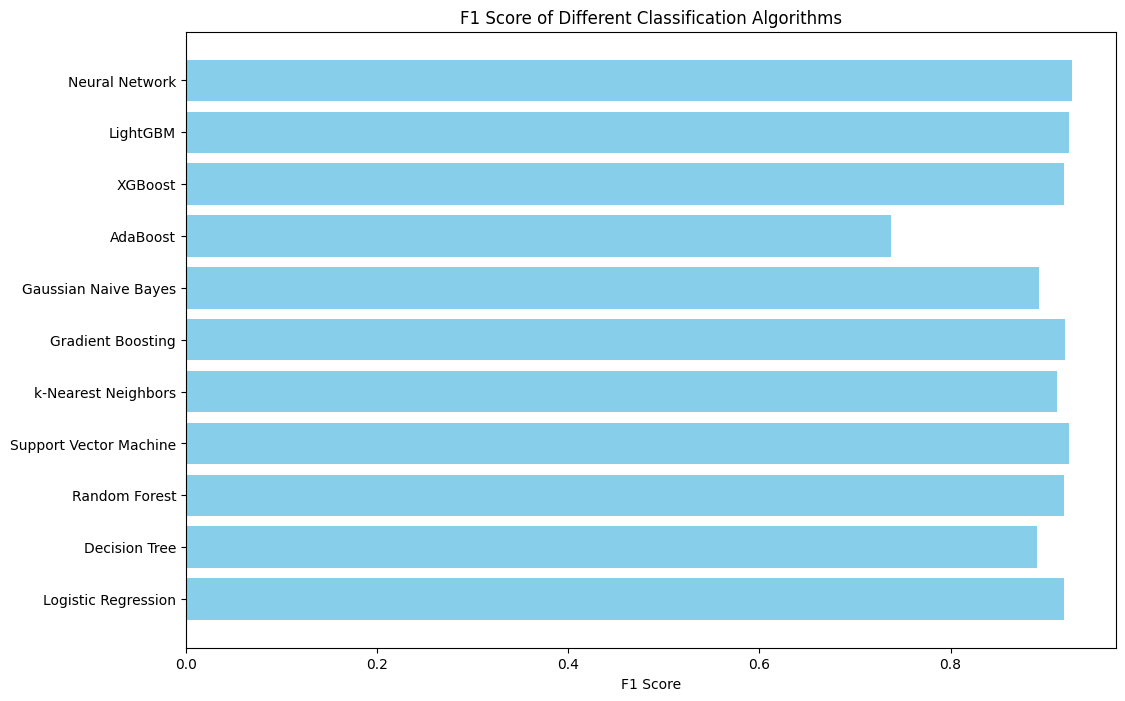

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Initialize lists to store classifier names, accuracies, precision, recall, and f1 score
classifier_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Combine classifiers
all_classifiers = {**ml_classifiers, **dl_classifiers}

# Train and test each classifier
for clf_name, clf in all_classifiers.items():
    # Train the classifier
    clf.fit(X_train_sc, y_train)

    # Test the classifier
    y_pred = clf.predict(X_test_sc)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append results to lists
    classifier_names.append(clf_name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Print model results
for clf_name, accuracy, precision, recall, f1 in zip(classifier_names, accuracies, precisions, recalls, f1_scores):
    print(f"{clf_name} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

# Visualize accuracy
plt.figure(figsize=(12, 8))
plt.barh(classifier_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Classification Algorithms')
plt.show()

# Visualize F1 scores
plt.figure(figsize=(12, 8))
plt.barh(classifier_names, f1_scores, color='skyblue')
plt.xlabel('F1 Score')
plt.title('F1 Score of Different Classification Algorithms')
plt.show()